<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Daniel Orozco Gómez y Julia María Domínguez Russell

**Fecha:** 14 de marzo del 2023

**Expediente** : 728143 y 749767
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/esdanyog/TAREA5_DOROZCO_JDOMINGUEZ

# Tarea 5: Clase 10


## <font color ='red'> **Tarea 5**  
Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$
Responda los siguientes literales:
1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.
2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).
3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 
4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada. El resultado debe ser como sigue:
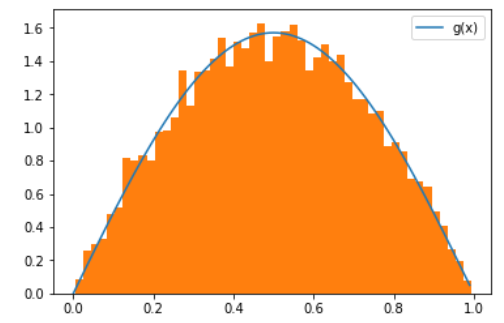

5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados. El resultado debe de ser como sigue:
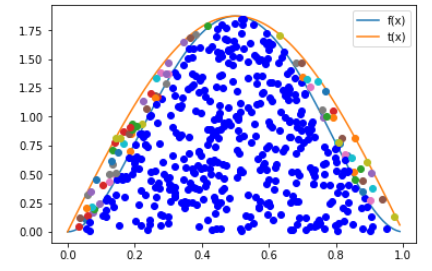

6. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir

7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

### Daniel Orozco Gómez

#### 1. Usar como función que mayora a  𝑓(𝑥)  a  𝑡(𝑥)=𝑎sin(𝜋𝑥)  donde a es el máximo de la función  𝑓(𝑥)  y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición  𝑡(𝑥)≥𝑓(𝑥) .

El maximo de fx, es:  [1.875]


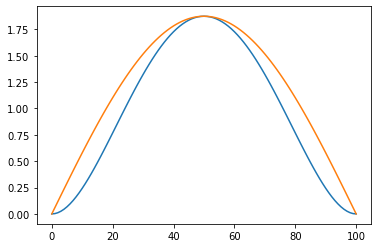

In [8]:
def f(x):
    return 30*(x**2 -2*x**3 + x**4)

c = f(optimize.fmin(lambda x:-f(x), 0, disp=False))
x = np.arange(0, 1, 0.01)

def t(x):
    return(c*np.sin(np.pi*x))

x = np.linspace(0,1,101)
f_x = list(map(f, x))

t_x = list(map(t, x))

plt.plot(f_x);
plt.plot(t_x);
print('El maximo de fx, es: ', c)

> Se cumple que $$t(x) ≥ f(x)$$

#### 2. Encontrar la función de densidad  𝑔(𝑥)  según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex)

1. Definir "c", $t(x)$ no es densidad de probabilidad 

$$c = \int_{-\infty}^{\infty} t(x) \cdot dx$$

2. Igualar 

$$g(x) = \frac{t(x)}{c}$$

3. Integrar y evaluar

$$\int_{0}^{1} a \sin(\pi x) \cdot dx$$


$$g(x) = \frac{ \pi \sin(\pi x)}{2}$$

#### 3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución  𝑔(𝑥) . Nota: Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex).

1. Integrar $g(x)$

$$ g(x) =  \int_{0}^{x} \frac{ \pi \sin(\pi x)}{2}, = \frac{1}{2}(- \cos(\pi x)+1) dx$$

2. Igualar U y luego despejar x

$$ U = \frac{1}{2}(- \cos(\pi x)+1) $$

$$ \frac{\cos^{-1}(-2U+1)}{\pi} = x$$

#### 4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución  𝑔(𝑥)  y comparar con su histograma para validar que los puntos generados siguen la distribución deseada. El resultado debe ser como sigue:

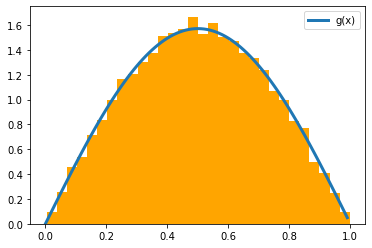

In [9]:
x = np.arange(0, 1, 0.01)

f = lambda x:30*(x**2-2*x**3+x**4)
t = lambda x: c*np.sin(np.pi*x)
g = lambda x: np.pi/2*np.sin(np.pi*x)

N = 10000
R2 = np.random.rand(N)
u = np.random.uniform(0, 1, N)

R1 =  (np.arccos(-2*u+1))/(np.pi) 

plt.hist(R1, 30, density = True, color = 'orange')
plt.plot(x, g(x), label = 'g(x)', lw = 3)
plt.legend()
plt.show()

#### 5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones  𝑓(𝑥)  y  𝑡(𝑥)  para validar que todos los cálculos anteriores están correctamente realizados. El resultado debe de ser como sigue:

In [10]:
def MAR(R2:'Variable distribuida U~U(0,1)',
                 R1:'Variable distribuida como g(x)',
                 f:'función objetivo',
                 t:'función > f'):
    f_x = f(R1)
    t_x = t(R1)
    condition = np.multiply(R2,t_x)<=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'*b') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]
    elem = [x for x in range(len(R1)) if condition[x]]
    return elem            
    plt.show()

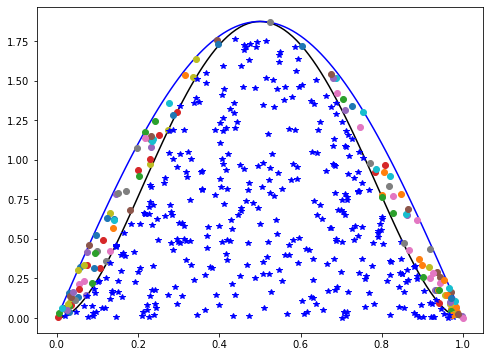

In [11]:
N = 500

x = np.arange(0,1,0.01)

plt.figure(figsize=(8, 6))
plt.plot(x,f(x),'k')
plt.plot(x,t(x),'b')
R2 = np.random.rand(N)
R1 = np.random.rand(N)

VA1 = MAR(R2,R1,f,t)

#### 6. Comparar el porcentaje de puntos de aceptación cuando se usa  𝑡(𝑥)  constante y  𝑡(𝑥)  un pulso senoidal. Concluir

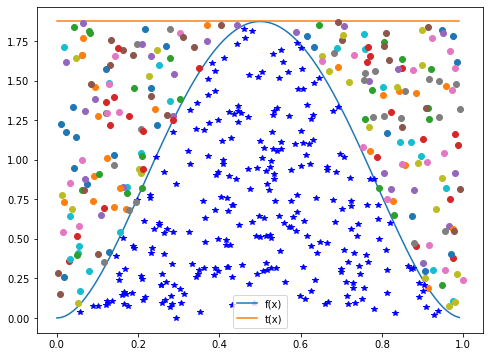

In [12]:
max_f = f(optimize.fmin(lambda x:-f(x), 0, disp=False))[0]

t_c = lambda x: max_f * np.ones(len(x))
N = 500

R2 = np.random.rand(N)
R1 = np.random.rand(N)

plt.figure(figsize=(8, 6))
plt.plot(x, f(x),label='f(x)')
plt.plot(x, t_c(x),label='t(x)')
plt.legend()

VA2 = MAR(R2, R1, f, t_c)
plt.show()

In [13]:
print(f'{len(VA1)/500*100}% de valores aceptados con t(x) senoidal')
print(f'{len(VA2)/500*100}% de valores aceptados con t(x) constante')

73.4% de valores aceptados con t(x) senoidal
53.0% de valores aceptados con t(x) constante


Por lo que la función t(x) con un pulso senoidal es mejor para generar variables dado que t(x) constante rechaza casi la mitad de los valores, y tendríamos que estar generando casi dos veces la cantidad de variables que queremos utilizar.

#### 7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
#### usando el método de aceptación y rechazo

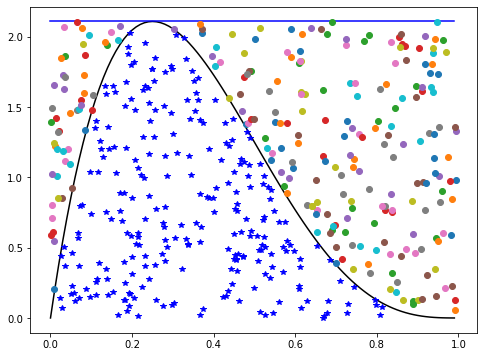

In [14]:
def f(x):
    return 20*x*(1-x)**3

N = 500

x = np.arange(0, 1, 0.01)

t = lambda x: np.max(f(x)) * np.ones([len(x)])

plt.figure(figsize=(8, 6))
plt.plot(x,f(x),'k')
plt.plot(x,t(x),'b')
R2 = np.random.rand(N)
R1 = np.random.rand(N)

MAR(R2,R1,f,t)
plt.show()

Código de solución estudiante 2

### Julia Domínguez

**1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.**

In [1]:
# Librería de optimización 
from scipy import optimize
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import random
# %matplotlib notebook
%matplotlib inline

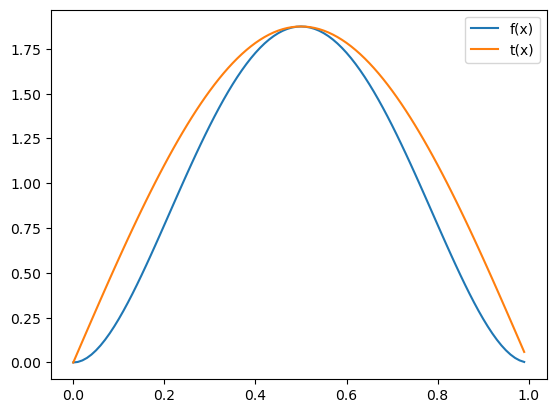

In [3]:
# Función objetivo 
f = lambda x: 30 *(x**2 - 2*x**3 + x**4)
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x), 0, disp=False))
# Función t 
t = lambda x: max_f * np.sin(np.pi * x)
x = np.arange(0, 1, 0.01)


# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend();

**2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).**

In [4]:
print('El máximo de f es:',max_f)

El máximo de f es: [1.875]


La función $g(x)=t(x)/c \rightarrow g(x)$ **es una densidad**.

$$c=\int_{-\infty}^{\infty}t(x)\geq 1$$

\begin{align}
t(x)& = a\sin(\pi x)\\
&= 1.875\sin(\pi x)
\end{align}

$$c=\int_{-\infty}^{\infty}1.875\sin(\pi x)\geq 1$$


La función $\int_{-\infty}^{\infty}1.875\sin(\pi x)$ no se puede integrar desde infinito a infinito, ya que no tiene un límite infinito. La integral no converge. Es por esto que establecemos límites finitos al integrar. En este caso, queremos evaular la integral entre $0$ y $1$. Es por esto que:

\begin{align}
\int_{0}^{1}1.875\sin(\pi x)dx & = \frac{1.875}{\pi}[-\cos(\pi x)]_{0}^{1}  \\
& = \frac{1.875}{\pi}[-\cos(\pi) + \cos(0)] \\
&= \frac{3.75}{\pi}
\end{align}


$$g(x)=\frac{t(x)}{c} $$
\begin{align}
g(x)& =\frac{1.875sin(\pi𝑥)}{\frac{3.75}{\pi}} \\
&= \frac{1.875\sin(\pi x)}{\frac{3.75}{\pi}}\\
& = \frac{1.875\sin(\pi x)}{3.75} \cdot \frac{\pi}{1} \\
& = \frac{1}{2}\pi\sin(\pi x)
\end{align}

**3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. Nota: Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex).**



$F(x) = \int_{-\infty}^{x} f(x)dx = \int_{-\infty}^{x} \frac{1}{2}\pi\sin(\pi t) dt$


\begin{align}
F(x) & = \int_{-\infty}^{x} \frac{1}{2}\pi\sin(\pi x) dx \\
& = -\frac{1}{2}\left[\cos(\pi x)\right]_{-\infty}^{x}\\
& =-\frac{1}{2}\cos(\pi x) + \frac{1}{2}
\end{align}

Por lo tanto, la función de densidad acumulada de la distribución $f(x) = \frac{1}{2}\pi\sin(\pi x)$ es:

 $$F(x) = -\frac{1}{2}\cos(\pi x) + \frac{1}{2}$$




**Tranformada Inversa**
$$F(x)= U \longrightarrow x= F^{-1}(U)$$ 

$$-\frac{1}{2}\cos(\pi x) + \frac{1}{2}= U$$

$$-\frac{1}{2}\cos(\pi x) = U - \frac{1}{2}$$

$$\cos(\pi x) = 1 - 2U$$

$$\pi x = \cos^{-1}(1 - 2U)$$

$$x = \frac{\cos^{-1}(1 - 2U)}{\pi}$$

$$H^{-1}(x)= \frac{\cos^{-1}(1 - 2U)}{\pi}$$

**4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada.**

In [6]:
def D_t ():
    return (math.acos(1- 2*np.random.rand()))/np.pi

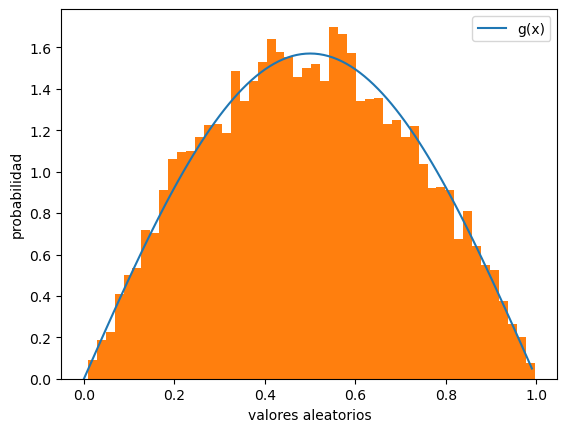

In [7]:
#Generación variable aleatoria continua
N= 10000

y= [D_t() for i in range(N)]

g = lambda x: 1/2 * np.pi* np.sin(np.pi * x)
x = np.arange(0, 1, 0.01)

# Graficamos el histograma para x
plt.plot(x,g(x),label='g(x)')
plt.hist(y,50,density=True)
plt.xlabel('valores aleatorios')
plt.ylabel('probabilidad')
plt.legend()
plt.show()


**5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados.**

In [8]:
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]
                
    plt.show()

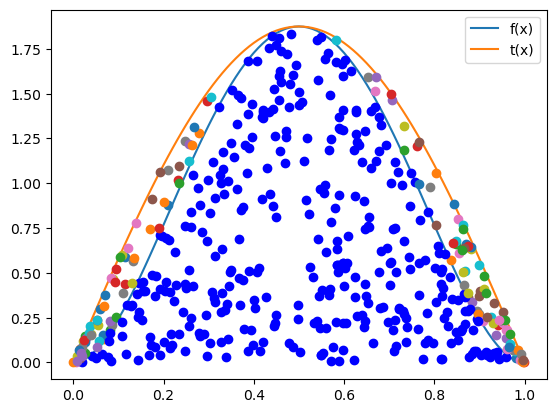

In [15]:
# Ilustración del método de aceptación y rechazo 

# Función objetivo 
f = lambda x: 30 *(x**2 - 2*x**3 + x**4)
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x), 0, disp=False))
# Función t -> Función constante
t = lambda x: max_f * np.sin(np.pi * x)

# Rango donde se graficará las funciones
x = np.arange(0, 1, 0.01)

# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

# Validación del método
N = 500 # número de puntos a simular
# Como estoy tomando t(x) constante solo es necesario generar valores aleatorios U~(0,1)
R2 = np.random.rand(N)
R1 = np.random.rand(N)

# Prueba de función creada
Acep_rechazo(R2, R1, f, t)

**6. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir**

In [17]:
def Acep_rechazo3(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    x = [R1[i] for i in range(len(R1)) if condition[i]]
                
    return x

In [16]:
#Cantidad de puntos aceptados cuando t(x) es un pulso senoidal
len(Acep_rechazo3(R2, R1, f, t))/500

0.714

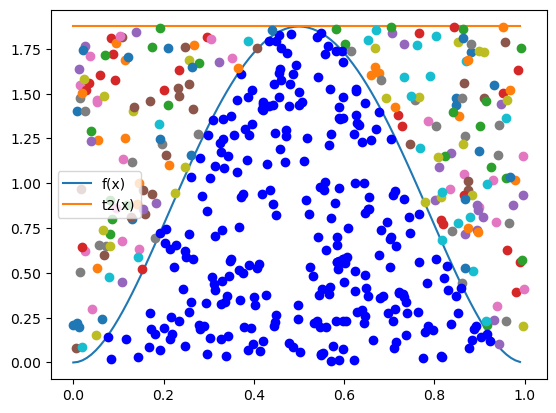

In [18]:
#Cuando t(x) es constante
t2 = lambda x: max_f * np.ones(len(x))
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t2(x),label='t2(x)')
plt.legend()
Acep_rechazo(R2, R1, f, t2)


In [19]:
#Cantidad de puntos aceptados cuando t(x) es un pulso senoidal
len(Acep_rechazo3(R2, R1, f, t2))/500

0.552

**Conclusión**

Cuando $t(x)$ es una función senoidal el procentaje de puntos que se aceptan es 71.4%. Mientras que cuando $t(x)$ es una constante el porcentaje de puntos que se aceptan es de 55.2%.

Se rechazan más puntos cuando $t(x)$ es una constante porque estamos evaluando con un área de rechazo más grande en comparación a cuando la función es senoidal. Cuando $t(x)$ es senoidal se aproxima a la función, dejando un área de rechazo más pequeña.

**7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo**

In [20]:
# Ilustración del método de aceptación y rechazo cuando se toma t(x) constante

# Función objetivo 
f = lambda x: 20*x*(1-x)**3
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x), 0, disp=False))
# Función t -> Función constante
t = lambda x: max_f * np.ones(len(x))

# Rango donde se graficará las funciones
x = np.arange(0, 1, 0.01)

# Validación del método
N = 1 # número de puntos a simular
# Como estoy tomando t(x) constante solo es necesario generar valores aleatorios U~(0,1)
R2 = np.random.rand(N)
R1 = np.random.rand(N)

# Prueba de función creada
Acep_rechazo3(R2, R1, f, t)

[0.22841943100895334]